# Point Estimates and Confidence Intervals

* 点估计

* 抽样分布与中心极限定理，及作图

* 置信区间及作图；边际误差公式：
    * 总体标准差σ已知：z-critical value
    * 总体标准差σ未知：t-critical value; t 分布

* stats.distribution.interval(alpha=confidence,
                              loc= sample_mean,
                              scale=std/(n**0.5))


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Point Estimates

总体参数未知：计算样本参数，以作为总体参数的估计值

例：美国大选，全国选民的平均年龄？样本平均年龄估计总体平均：

In [4]:
# 构造总体数据：
np.random.seed(1234)
population_ages1= stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2= stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages= np.concatenate((population_ages1,population_ages2))

population_ages.mean() #真实的总体均值

42.986683999999997

np.random.choice?

In [3]:
# 随机抽样：
np.random.seed(6)

sample_ages = np.random.choice(a= population_ages,size=500) # sample 500 value 

print(sample_ages.mean())  # 样本均值，即总体均值的点估计
print(population_ages.mean()-sample_ages.mean()) 

42.104
0.882684


### 选民中各人种比例估计：

In [5]:
import random
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
    
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values


In [6]:
for race in set(demo_sample):                  # 唯一值的集合
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )

asian proportion estimate:
0.099
other proportion estimate:
0.099
hispanic proportion estimate:
0.192
white proportion estimate:
0.379
black proportion estimate:
0.231


## Sampling Distributions and The Central Limit Theorem

样本的分布趋向总体的分布，如果总体分布是skewed，样本分布也会是skewed：

-0.12071085179560549


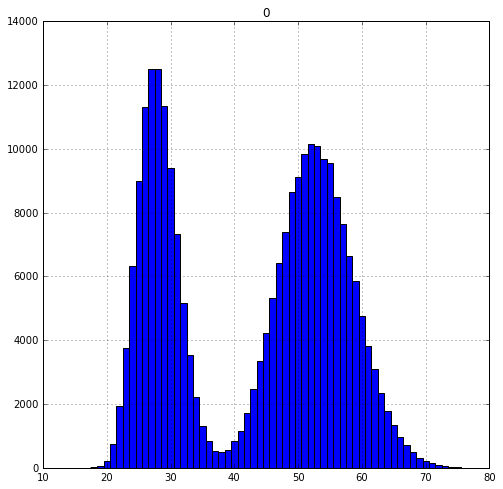

In [22]:
pd.DataFrame(population_ages).hist(bins=58,          # 年龄分组组数为58
                                  range=(17.5,75.5), # 年龄范围
                                  figsize=(8,8))
print(stats.skew(population_ages))                 # 总体的偏度


上图可见：该分布偏度很小；不是正态分布，而是一个对称的钟形曲线，有2个峰的二项的双峰分布。那么，从该总体中抽样的样本分布也近似这个形状和偏度：

-0.06514140504366635


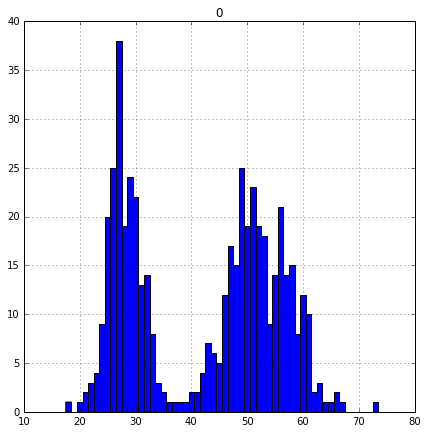

In [23]:
# 样本的分布图
pd.DataFrame(sample_ages).hist(bins=58,
                               range=(17.5,75.5),
                               figsize=(7,7))

print(stats.skew(sample_ages))

### 因为不是正态分布，我们也就不能用 适用于正态分布的技巧。庆幸的是，有 central limit theorem中心极限定理，它是概率统计中最重要的定理之一。
* 一个总体可以有许多个样本，就有了许多个样本均值，这些样本均值的分布 被称为【抽样分布】，服从正态分布。
* 即使总体分布自身不是正态分布，该定理也适用。
* 因此，我们可以将样本均值当作一个随机变量，从正态分布中抽取的随机变量。

具体地：

创建一个抽样分布，方式为：从总体中抽取200个样本（每个样本里有n 行observations），然后做200个 总体均值的点估计（200 point estimates of the mean)：

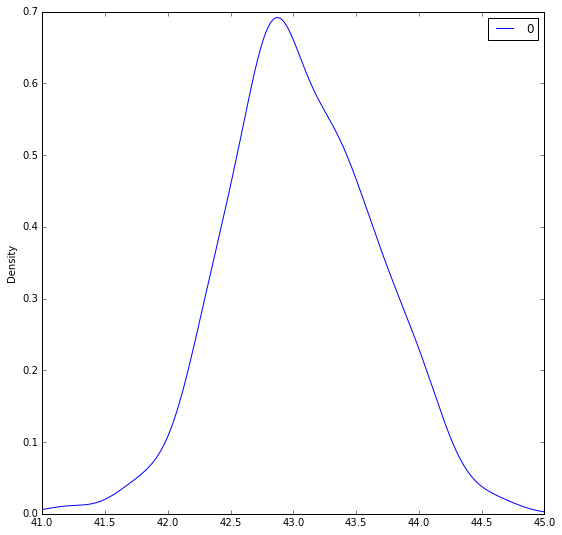

In [24]:
np.random.seed(10)

point_estimates = []

for x in range(200):             
    sample = np.random.choice(a=population_ages,size=500)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind='density',
                                   figsize=(9,9),
                                  xlim = (41,45))

上图可以看出，抽样分布近似正态分布，尽管抽样来自非正态的、双峰的总体分布。而且，抽样分布的均值接近真实的总体均值：

In [26]:
population_ages.mean()- np.mean(point_estimates)

#The more samples we take, the better our estimate of the population parameter is likely to be.

-0.078246000000000038

## Confidence Intervals 置信区间

A confidence interval is a range of values above and below a point estimate that captures the true population parameter __at some predetermined confidence level__. For example, if you want to **have a 95% chance of capturing** the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. __Higher confidence levels result in a wider confidence intervals.__
!['总体标准差已知'](1.png)

In [32]:
# to get z-critical values with stats.norm.ppf()

np.random.seed(10)
sample_size = 1000

sample = np.random.choice(a = population_ages,size=sample_size)
sample_mean = sample.mean()


z_critical = stats.norm.ppf(q = 0.975) # percent point function,inverse of cdf.已知面积(概率），返回百分位点（横坐标）

print('z-value: ', z_critical)

pop_stdev = population_ages.std()   # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval: \n",confidence_interval)

z-value:  1.95996398454
Confidence interval: 
 (41.501933037831968, 43.140066962168028)


*Note: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails.

通过作图理解置信区间：

plt.errorbar()

### 同一个总体抽样25次，做25个置信区间并作图：

np.random.seed(12)
sample_size = 1000
intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a = population_ages,size=sample_size)
    sample_mean=sample.mean()
    sample_means.append(sample.mean())
    
    z_critical = stats.norm.ppf(q=0.975)
    pop_stdev = population_ages.std()
    margin_of_error = z_critical * (pop_stdev/np.sqrt(sample_size))
    
    confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)
    intervals.append(confidence_interval)

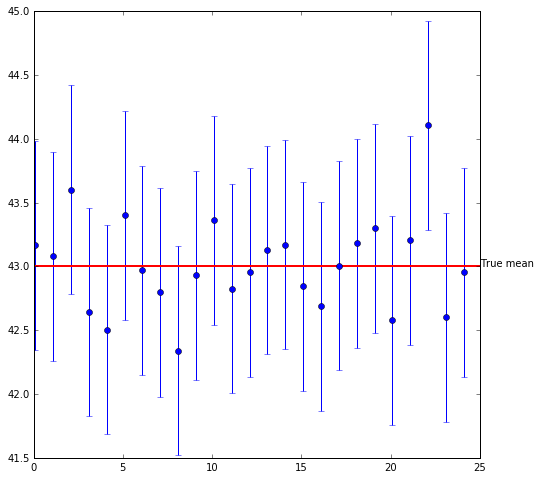

In [8]:
plt.figure(figsize=(8,8))

plt.errorbar(x=np.arange(0.1,25,1),                 
             y=sample_means,
            yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0,xmax=25,
           y = 43.0023,
           linewidth = 2.0,
           color = 'red')

plt.text(x=25,y=43,s='True mean')

上图可以看出，all but one 置信区间都与真实的总体均值重叠，这也正如所料，95%的置信水平即 captures the true mean 95% of the time，5%的容错，这里为1/25约等于5%

### 当总体标准差σ未知，
* 此时总体均值μ和σ均未知，求置信区间时，需要 用样本标准差 来估计出 总体标准差 再代入.
* 但这样可能放大误差，因此我们用t-critical value 来代替 z-critical value. 
* t-criticl value  取自 t 分布
* t distribution 非常近似正态分布，样本容量越小，t分布会变得越宽；当样本容量很大时，t分布逼近正态分布
* 使用t分布必须提供参数“自由度” : df = 样本容量n - 1;因此n 越大即df 越大，越近似正态分布，如下图
* __scipy.stats.t.ppf()__  ：t-critical value
* ![t](b.png) ![t](c.png)

In [51]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a = population_ages,size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value: ", t_critical)     # Check the t-critical value

sample_stdev = sample.std()        # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:  2.06389856163
Confidence interval:
(37.667448793806457, 47.292551206193536)


* 注意，当用于95%置信区间时，，t-critical 比 z-critical 大，使得边际误差变大、区间变宽，以容纳 【用样本标准差估计 替代 总体标准差】放大的误差。
* 如果使用大样本，实际上，自由度大于100时，t值会很好地近似 【标准正态的z值】：

In [52]:
# Check the difference between critical values with a sample size of 1000
stats.t.ppf(q = 0.975,df=999) - stats.norm.ppf(q=0.975)

0.0023774765933946007

* 实际上可用stats.t.interval() 计算置信区间

In [53]:
stats.t.interval(alpha = 0.95,       # confidence level
                 df = 24,            # degree of freedom
                 loc = sample_mean,  # sample mean
                 scale = sigma)      # standard deviation estimate

(37.667448793806457, 47.292551206193536)

### 总体比率的区间估计
![2](d.png)

In [55]:
#已知样本中，西班牙裔选民占比0.192，求总体中西班牙裔的占比

z_critical = stats.norm.ppf(0.975)

p = 0.192

n = 1000

margin_of_error = z_critical * (np.sqrt((p*(1-p))/n))

p_confidence_interval = (p - margin_of_error, p + margin_of_error)

print(p_confidence_interval)

(0.16758794241348748, 0.21641205758651252)


* **stats.distribution.interval()** function to calculate a confidence interval

In [56]:
# 此例中，根据中心极限定理，变量（p均值） 的抽样分布 服从正态分布：
stats.norm.interval(alpha = 0.95,
                    loc = 0.192,                   # Point estimate of proportion
                    scale = math.sqrt((p*(1-p))/n)) 

(0.16758794241348748, 0.21641205758651252)